***Nhóm 25*** </br>
Thành viên:
- Liêu Hải Lưu Danh - 22120459
- Đỗ Thanh Tùng - 22120408
- Phạm Ngọc Hoà - 22120109

# 1. Import Libraries

In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f_oneway
from scipy.stats import ttest_ind

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

# 2. Read Dataset

In [8]:
df = pd.read_csv('student_depression.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# 3. Preprocess Data


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [10]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [11]:
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].median())

# 4. EDA

## 1. Phân bổ nhân khẩu học và bệnh trầm cảm

- Câu hỏi: Phân bố các sinh viên theo độ tuổi, giới tính, liên hệ với bệnh trầm cảm như thế nào?
- Mục đích: Bệnh trầm cảm thường gặp phải ở những độ tuổi nào, nam hay nữ dễ bị trầm cảm hơn.

In [87]:
df1=df[['Age','Gender','City','Depression']]
df1['Age group']=pd.cut(df['Age'],bins=[0,20,25,30,100],
           labels=['Below 20','21-25','26-30','Above 30'])
df1['Age group'].value_counts().index

CategoricalIndex(['21-25', '26-30', 'Above 30', 'Below 20'], categories=['Below 20', '21-25', '26-30', 'Above 30'], ordered=True, dtype='category')

In [105]:
df1=df[['Age','Gender','City','Depression']]
df1['Age group']=pd.cut(df['Age'],bins=[0,20,25,30,100],
           labels=[1,2,3,4])
df1['Age group'].value_counts().index


# Concatenate the dummy variables back to the original DataFrame
df1['Gender']=pd.get_dummies(df1['Gender'], drop_first=True)
# df1['Gender']=pd.get_dummies(df1, columns=['Gender'],drop_first=True)
df1['Age group']=df1['Age group'].astype(np.uint8)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         27901 non-null  float64
 1   Gender      27901 non-null  uint8  
 2   City        27901 non-null  object 
 3   Depression  27901 non-null  int64  
 4   Age group   27901 non-null  uint8  
dtypes: float64(1), int64(1), object(1), uint8(2)
memory usage: 708.5+ KB


In [106]:
df1[['Age group','Gender','Depression']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age group   27901 non-null  uint8
 1   Gender      27901 non-null  uint8
 2   Depression  27901 non-null  int64
dtypes: int64(1), uint8(2)
memory usage: 272.6 KB


<Axes: >

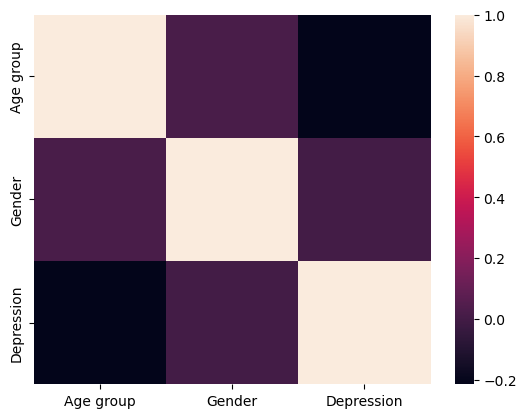

In [107]:
sns.heatmap(df1[['Age group','Gender','Depression']].corr())

Dựa vào heatmap, ta có thể nhận xét rằng có trầm cảm hay không có mối liên hệ tuyến tính với độ tuổi.  
Bên cạnh đó giới tính không hề có mối liên hệ tuyến tính nào với các thuộc tính được sử dụng khác.

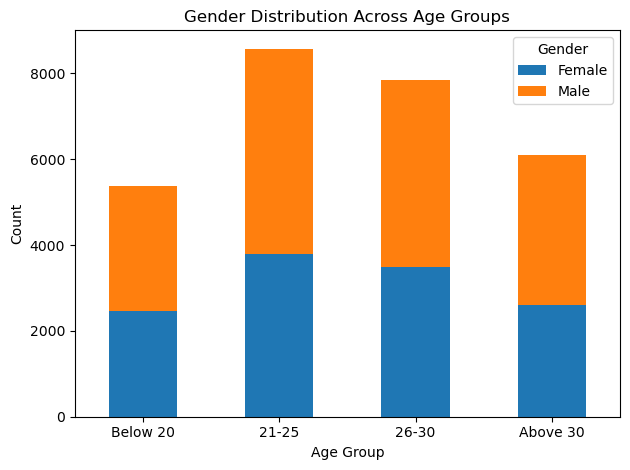

In [ ]:
age_gender_counts = df1.groupby(['Age group', 'Gender']).size().unstack(fill_value=0)

# Plotting
age_gender_counts.plot(kind='bar', stacked=True)  # Change to stacked=True for a stacked bar chart

plt.title('Gender Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.legend(title='Gender')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

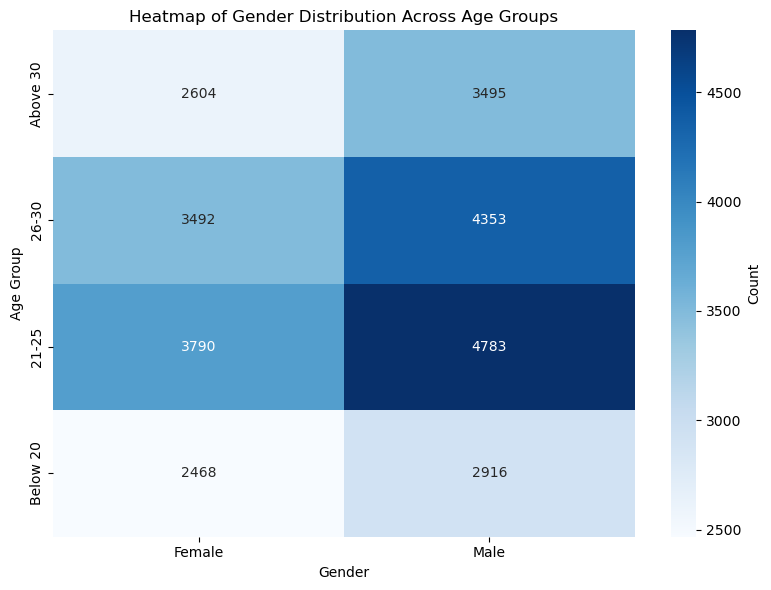

In [ ]:
# Plotting a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(age_gender_counts[::-1], annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Gender Distribution Across Age Groups')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Age group')

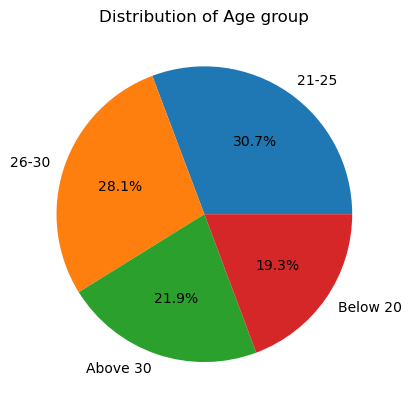

In [61]:
plt.pie(df1['Age group'].value_counts(),
        labels=df1['Age group'].value_counts().index,
        autopct='%1.1f%%');
plt.title('Distribution of Age group');

In [ ]:
Có thể thấy phần lớn đối tượng được khảo sát nằm trong độ tuổi từ 20 đến 

## 2. Liên hệ giữa nhân khẩu học và kết quả học tập

- Câu hỏi: Độ tuổi, giới tính, hoặc địa điểm (thành phố) có mối liên hệ gì với CGPA không?
- Mục đích: Xem xét liệu các đặc điểm nhân khẩu học có tương quan với hiệu suất học tập hay không.

## 3. Thời lượng ngủ và các yếu tố liên quan

- Câu hỏi: Thời lượng ngủ trung bình có liên quan như thế nào với áp lực học tập (Academic Pressure), áp lực công việc (Work Pressure), và CGPA?
- Mục đích: Tìm hiểu xem việc nghỉ ngơi có ảnh hưởng đến áp lực và kết quả học tập hay không.

In [13]:
print('Dữ liệu cột Work Pressure:\n',df['Work Pressure'].value_counts())
print('Dữ liệu cột Job Satisfaction:\n',df['Job Satisfaction'].value_counts())

Dữ liệu cột Work Pressure:
 0.0    27898
5.0        2
2.0        1
Name: Work Pressure, dtype: int64
Dữ liệu cột Job Satisfaction:
 0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: Job Satisfaction, dtype: int64


Hơn 99% giá trị của Work Pressure = 0 làm cho việc kết quả khảo sát ý nghĩa của cột này sẽ không đáng tin cậy nên chúng em không khảo sát trên Work Pressure.  
Khi đó câu hỏi còn lại là "Thời lượng ngủ trung bình có liên quan như thế nào với áp lực học tập (Academic Pressure), và CGPA?"

In [14]:
df['Sleep Duration'].value_counts()

Less than 5 hours    8310
7-8 hours            7346
5-6 hours            6183
More than 8 hours    6044
Others                 18
Name: Sleep Duration, dtype: int64

Dữ liệu của lớp Others rất ít so với các lớp còn lại khiến cho kết luận đưa ra trên lớp này sẽ không đáng tin cậy. Do đó, chúng em sẽ chỉ khảo sát trên 4 lớp còn lại

In [15]:
df3= df[df['Sleep Duration']!='Others']

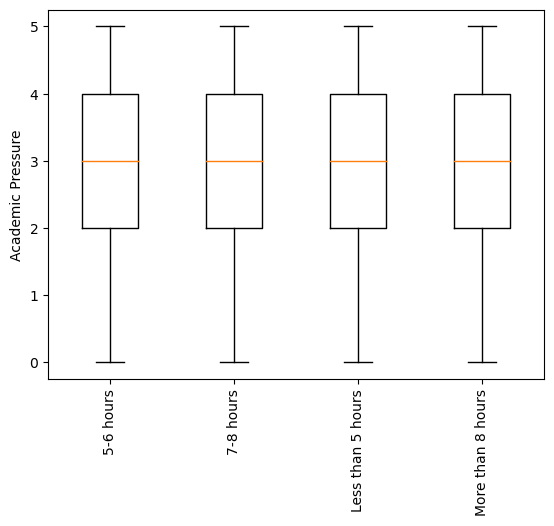

In [16]:
tmp=df3.groupby(['Sleep Duration'])['Academic Pressure'].apply(list)
# ax.boxplot()

_,ax=plt.subplots()
ax.boxplot(tmp,labels=tmp.index);
plt.xticks(rotation=90)
plt.ylabel('Academic Pressure')
plt.show()


In [17]:
groups = [df3[df3['Sleep Duration'] == i]['Academic Pressure'] for i in df3['Sleep Duration'].unique().tolist()]
anova_result = f_oneway(*groups)
print("Kết quả kiểm định ANOVA cho :", anova_result.pvalue)

Kết quả kiểm định ANOVA cho : 2.5889723032458856e-13


Giá trị p-value <0.05 nên không thể kết luận có sự sai khác về 

Cả 4 boxplot đều như nhau nên không thể kết luận rằng thời lượng giấc ngủ trung bình có ảnh hưởng tới điểm trung bình tích lũy môn học.

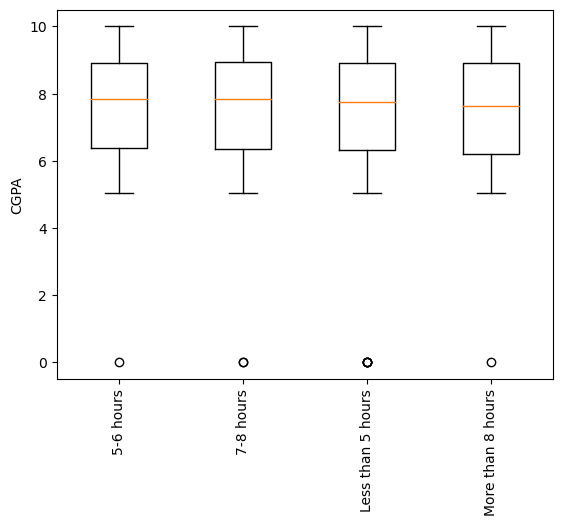

In [18]:
tmp=df3.groupby(['Sleep Duration'])['CGPA'].apply(list)
# ax.boxplot()

_,ax=plt.subplots()
ax.boxplot(tmp,labels=tmp.index);
plt.xticks(rotation=90)
plt.ylabel('CGPA')
plt.show()

In [19]:
groups = [df3[df3['Sleep Duration'] == i]['CGPA'] for i in df3['Sleep Duration'].unique().tolist()]
anova_result = f_oneway(*groups)
print("Kết quả kiểm định ANOVA cho :", anova_result.pvalue)

Kết quả kiểm định ANOVA cho : 0.0036041277600854602


## 4. Mối liên hệ giữa nghề nghiệp và áp lực

- Câu hỏi: Việc sinh viên làm thêm hay có nghề nghiệp ngoài giờ (Profession) có ảnh hưởng gì đến mức độ áp lực công việc (Work Pressure), sự hài lòng trong học tập (Study Satisfaction) và sự hài lòng trong công việc (Job Satisfaction)?
- Mục đích: Xem xét tác động của việc vừa học vừa làm đối với sức khỏe tinh thần và sự hài lòng cá nhân.

## 5. Tương quan giữa áp lực học tập và công việc

- Câu hỏi: Áp lực học tập và áp lực công việc có mối tương quan như thế nào và sự kết hợp của chúng ảnh hưởng ra sao đến mức độ hài lòng trong học tập (Study Satisfaction) và mức độ hài lòng trong công việc (Job Satisfaction)?
- Mục đích: Hiểu rõ tác động kép của áp lực lên mức độ hài lòng.

## 6. Thói quen ăn uống và sức khỏe tinh thần

- Câu hỏi: Thói quen ăn uống (Dietary Habits) có liên quan đến thời lượng ngủ (Sleep Duration), sự hài lòng trong học tập hoặc sự hài lòng trong công việc như thế nào?
- Mục đích: Xem dinh dưỡng có đóng vai trò hỗ trợ trạng thái tinh thần và chất lượng cuộc sống hay không.

## 7. Mối liên hệ giữa áp lực và điểm số

- Câu hỏi: Sinh viên chịu áp lực học tập cao có CGPA(Cumulative Grade Point Average) khác biệt so với những sinh viên áp lực thấp không?
- Mục đích: Xem liệu áp lực cao có tương quan với hiệu suất học tập tốt hơn hoặc kém hơn.

In [20]:
stats = df.groupby('Academic Pressure')['CGPA'].agg(['mean', 'std', 'count'])
stats

,mean,std,count
Academic Pressure,,,
0.0,2.173333,3.375363,9
1.0,7.724066,1.467177,4801
2.0,7.699495,1.496335,4178
3.0,7.646876,1.454031,7462
4.0,7.616541,1.455500,5155
5.0,7.626653,1.467877,6296


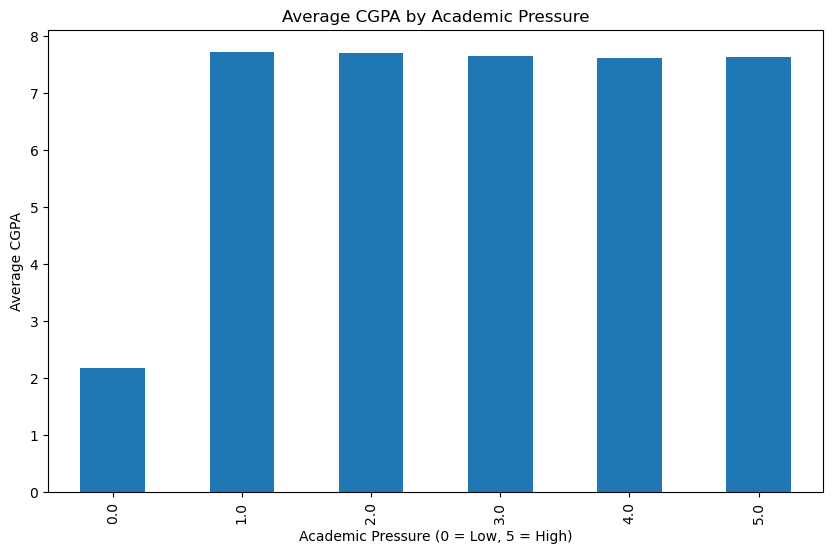

In [21]:
plt.figure(figsize=(10, 6))
stats['mean'].plot(kind='bar', title='Average CGPA by Academic Pressure')
plt.xlabel('Academic Pressure (0 = Low, 5 = High)')
plt.ylabel('Average CGPA')
plt.show()

- Nhìn vào kết quả thống kê trên ta thấy được điểm trung bình tích luỹ(CGPA) tăng đáng kể khi áp lực học tập(Academic Pressure) tăng từ **0 lên 1**. Sau đó thì trung bình tích luỹ duy trì khá ổn định (7.6 -> 7.7) với mức áp lực từ 1 đến 5

***Kết luận:*** </br>
- Áp lực học tập thấp nhất (0.0) dường như có liên quan đến hiệu suất học tập kém. Độ lệch chuẩn cũng rất cao (~3.37) chứng tỏ kết quả không ổn định trong nhóm này. 

*Tuy nhiên count nhóm này chỉ có 9, cần phải có thêm nhiều dữ liệu về nhóm này hơn để đưa ra kết luận cuối cùng*
- Khi áp lực tăng lên thì điểm số dường như rất ổn định ở mức 7.6->7.7 với std khoảng 1.45->1.49 - chứng tỏ có sự ổn định giữa các sinh viên

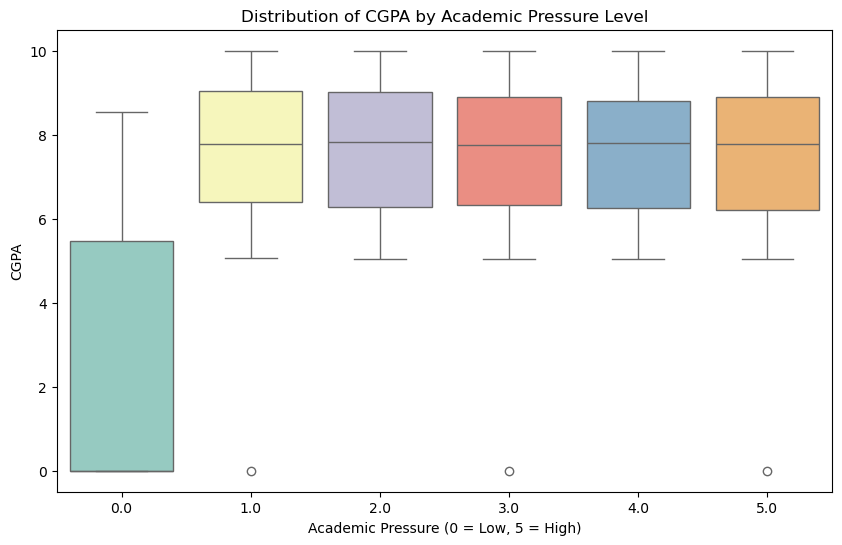

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Academic Pressure', y='CGPA', palette='Set3')
plt.title('Distribution of CGPA by Academic Pressure Level')
plt.xlabel('Academic Pressure (0 = Low, 5 = High)')
plt.ylabel('CGPA')
plt.show()

In [23]:
groups = [df[df['Academic Pressure'] == i]['CGPA'] for i in range(1, 6)]
anova_result = f_oneway(*groups)
print("ANOVA result(p-value) for Academic Pressure (1->5):", anova_result.pvalue)

ANOVA result(p-value) for Academic Pressure (1->5): 0.0003943327785013564


p-value của Kiểm định ANOVA = 0.00039 < 0.05 suy ra được là không có sự khác nhau về CGPA của các mức áp lực từ 1->5 

Có thể thấy trừ khi sinh viên không có một chút áp lực học tập nào(0.0) thì CGPA mới kém và mất ổn định

Các áp lực từ 1.0 -> 5.0 kết quả cho thấy không có sự dao động nào quá nhiều, khoảng CGPA cũng gần như tương đồng nhau. 

**=> Kết luận chung:** Nếu muốn tối ưu hiệu suất học tập, một mức độ áp lực học tập vừa phải là lý tưởng. Không cần phải quá đặt nặng áp lực nhưng cũng đừng quá buông lỏng. 

## 8. Sự hài lòng trong học tập và công việc:
- Câu hỏi: Sự hài lòng trong học tập (Study Satisfaction) có ảnh hưởng đến CGPA không?
- Mục đích: Xem xét mối quan hệ giữa mức độ hài lòng cá nhân với hiệu suất và sức khỏe.


In [24]:
study_stats = df.groupby('Study Satisfaction')['CGPA'].agg(['mean', 'std', 'count'])
study_stats

,mean,std,count
Study Satisfaction,,,
0.0,1.717000,2.765735,10
1.0,7.745137,1.451340,5451
2.0,7.728684,1.475230,5838
3.0,7.624382,1.466556,5821
4.0,7.642696,1.449052,6359
5.0,7.525002,1.482607,4422


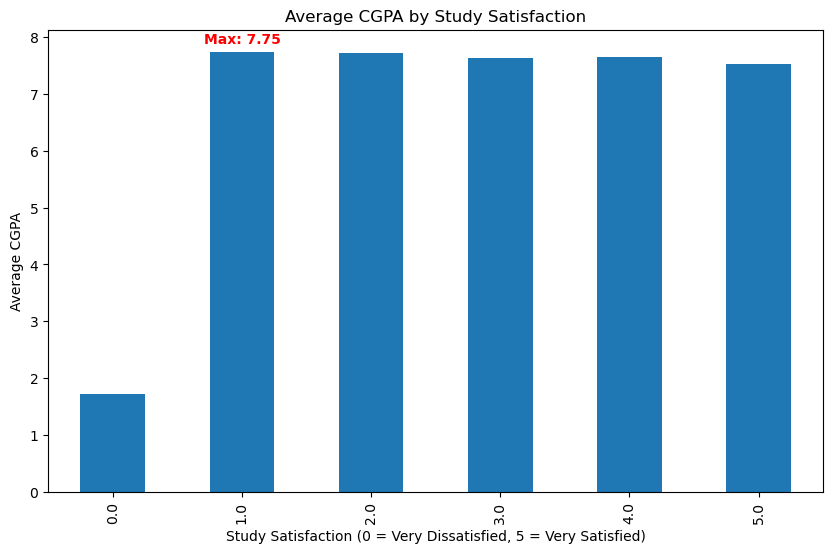

In [25]:
study_stats['mean'].plot(kind='bar', title='Average CGPA by Study Satisfaction', figsize=(10, 6))
plt.ylabel('Average CGPA')
plt.xlabel('Study Satisfaction (0 = Very Dissatisfied, 5 = Very Satisfied)')

# Tìm vị trí của giá trị max
max_idx = study_stats['mean'].idxmax()
max_value = study_stats['mean'].max()

# Thêm nhãn cho cột max
plt.text(x=max_idx, y=max_value + 0.1, s=f'Max: {max_value:.2f}', 
         ha='center', va='bottom', fontsize=10, color='red', fontweight='bold')

plt.show()

In [26]:
correlation = df['Study Satisfaction'].corr(df['Academic Pressure'])
print("Hệ số tương quan Pearson giữa Study Satisfaction và Academic Pressure:", correlation)

Hệ số tương quan Pearson giữa Study Satisfaction và Academic Pressure: -0.11098809743084373


Nhìn vào kết quả thống kê ta thấy được:
-  Study Satisfaction = 0(không hài lòng): Mean = 1.717, rất thấp so với các nhóm khác, điều này cho sinh viên không hài lòng trong học tập sẽ có kết quả rất kém. std nhóm này cũng cao (2.7) cho thấy sự dao động lớn về CGPA của nhóm này so với các nhóm còn lại (1.44 < std < 1.48). Tuy nhiên count nhóm này chỉ có 10, cần bổ sung thêm nếu muốn đưa ra kết luận chắc chắn

- Study Satisfaction = 1 (hài lòng mức độ thấp): Mean = 7.745, cao nhất trong các nhóm, đây là một điều khá thú vị vì mức độ hài lòng gần như thấp nhất nhưng mang lại kết quả cao nhất. Điều này có thể là do họ cảm thấy họ chưa hài lòng với việc học của mình, họ nghĩ "mình có thể làm tốt hơn". Đây có thể là động lực để giúp họ đẩy cao kết quả học tập. (Tuy nhiên khác với mức độ 0 vì đây là trạng thái cực đoạn)

- Study Satisfaction từ 2 -> 5: sinh viên có mức độ hài lòng ở khoảng này CGPA không tăng mà còn giảm nhẹ, đặc biệt là từ 3 -> 5. Có thể việc quá hài lòng dẫn cho họ đến một chút lơ là trong học tập, dẫn đến CGPA không được tốt.

Nhìn vào hệ số tương quan:


# 5. Modeling